#                                                  Exercise 5

# 1. Teen Birth Rate & Poverty Level Data

**Yêu cầu: Thực hiện linenear regression để từ Poverty Level => dự đoán Teen Birth Rate**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read poverty level data

In [2]:
df=pd.read_csv("poverty.txt", sep="\t")
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


#### Check data description

In [3]:
df.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


#### Check the relationship between TeenBrth and Povertylevel

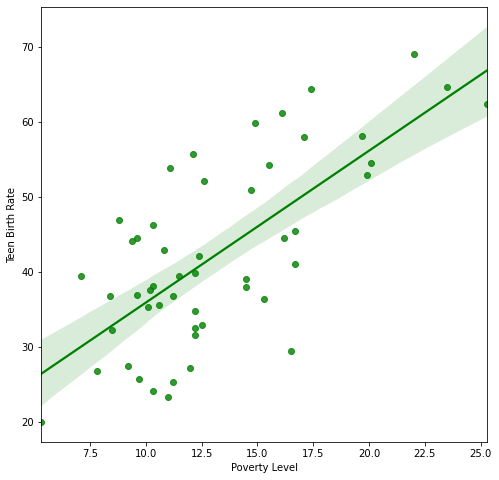

In [4]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x="PovPct", y="TeenBrth", color="g")
plt.xlabel("Poverty Level")
plt.ylabel("Teen Birth Rate")
plt.show()

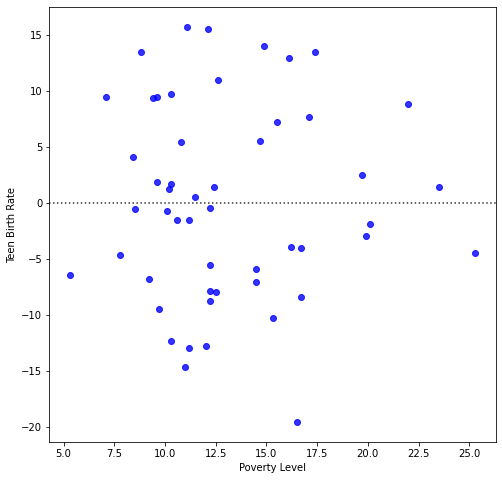

In [5]:
# Check the residual plot

plt.figure(figsize=(8,8))
sns.residplot(data=df, x="PovPct", y="TeenBrth", color="b")
plt.xlabel("Poverty Level")
plt.ylabel("Teen Birth Rate")
plt.show()

## Split dataset into training and testing set

In [6]:
# Training features
X=df[["PovPct"]]
# Target variable or response variable 
y=df[["TeenBrth"]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=12)

## Train the model

In [8]:
from sklearn.linear_model import LinearRegression
simpleModel=LinearRegression()
simpleModel.fit(X_train, y_train)

LinearRegression()

In [9]:
# Obtain model parameters 
intercept=simpleModel.intercept_

slope=simpleModel.coef_[0]

print("Intercept is {:.3} and Slope is {:.3}".format(intercept[0], slope[0]))

Intercept is 18.6 and Slope is 1.8


**General Formula** <br>

$\hat{Y}= \hat{\beta}_{0} + \sum \limits _{j=1}^{p} X_{j} \hat{\beta}_{j}$ <br>

**Teen birth Fomula** <br>

Teenbrth=18.5 + 1.77*poverty



## Make prediction based on X_test

In [10]:
y_pred=simpleModel.predict(X_test)

df_pred=pd.DataFrame({"Predicted": [x[0] for x in y_pred.tolist()], "Actual": [x[0] for x in y_test.values.tolist()]})

df_pred.head()

,Predicted,Actual
0,38.596630,53.9
1,41.117772,33.0
2,37.155978,46.3
3,46.520219,54.3
4,38.776712,36.8


## Model Accuracy Check

In [11]:
# Check R^2 for train dataset
R2_train=simpleModel.score(X_train, y_train)
# Check R^2 for Test dataset
R2_test=simpleModel.score(X_test, y_test)

print("R2_train is {:.3} and R2_test is {:.3}".format(R2_train, R2_test))

R2_train is 0.454 and R2_test is 0.553


In [12]:
# Check MSE and MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE=mean_squared_error(y_test, y_pred)
MAE=mean_squared_error(y_test, y_pred)

print("MSE is {:.3} and MAE is {:.3}".format(MSE, MAE))

MSE is 98.0 and MAE is 98.0


## Visualization the result 

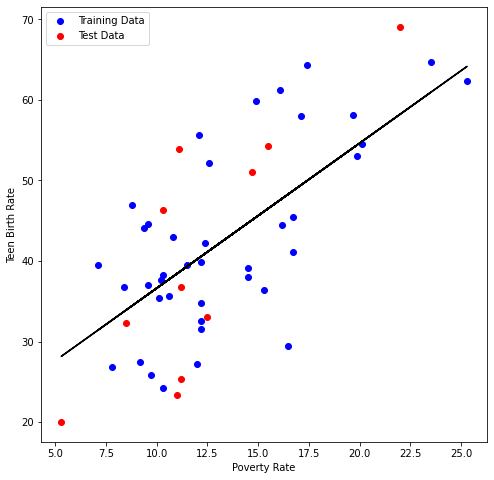

In [13]:
# Create a regression line
regressionLine=simpleModel.predict(X)
# Set plt 
plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train, label="Training Data", color="b")
plt.scatter(X_test, y_test, label="Test Data", color="r")
plt.plot(X, regressionLine, color="k")
plt.xlabel("Poverty Rate")
plt.ylabel("Teen Birth Rate")
plt.legend()
plt.show()

- *Looking at the model accuracy, it seems that the model is not performed very well since the R^2 is 0.62. This means that the Poverty rate can explain 62% of variance in teen birth rate. Hence, there may be a better model or better combination of features. Let's check out*

# Polynomial Model (Simple)

In [14]:
# Fit the second order polynomial model
polyModel=np.polyfit(X_train["PovPct"], y_train["TeenBrth"],2) # X_train and y_train should be pandas series not a dataframe

modelParam=np.poly1d(polyModel)

In [15]:
# Make a prediction on test dataset
y_pred=modelParam(X_test)

In [16]:
# Check R^2 for train and test
from sklearn.metrics import r2_score
R2_test=r2_score(y_test, y_pred)
R2_train = r2_score(y_train,modelParam(X_train))

print("R2_test is {:.3} and R2_train is {:.3}".format(R2_test, R2_train))

R2_test is 0.534 and R2_train is 0.458


In [17]:
# Check MSE and MAE
MSE=mean_squared_error(y_test, y_pred)

MAE=mean_absolute_error(y_test, y_pred)

print("MSE is {} and MAE is {:.3}".format(round(MSE,2), MAE))

MSE is 102.19 and MAE is 9.16


- *Polynomial may not be suitable since it did not increase the model performance.*

## Adding more features or selection 

In [18]:
# Input features 
X=df[[ 'PovPct', 'ViolCrime']]
y=df[["TeenBrth"]]

In [19]:
# SelectKbest features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestFeature=SelectKBest(score_func=f_regression, k="all")

fitModel=bestFeature.fit(X,y)

# make dataframe showing the features and scores

featureImportance=pd.DataFrame({"Feature":X.columns.tolist(),"Score":fitModel.scores_})

featureImportance

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Feature,Score
0,PovPct,47.954695
1,ViolCrime,22.147874


In [20]:
X.columns.tolist()

['PovPct', 'ViolCrime']

- *The feature selection showed that poverty rate is a good indicator, and therefore given a priority. ViolCrime is not so good indicator in this example.*

# Exercise 6

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [22]:
df=pd.read_csv("petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Descriptive statistics and visualization

In [23]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [24]:
# Correlation matrix
df.iloc[:,0:4].corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037
Average_income,0.012665,1.000000,0.050163,0.157070
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000


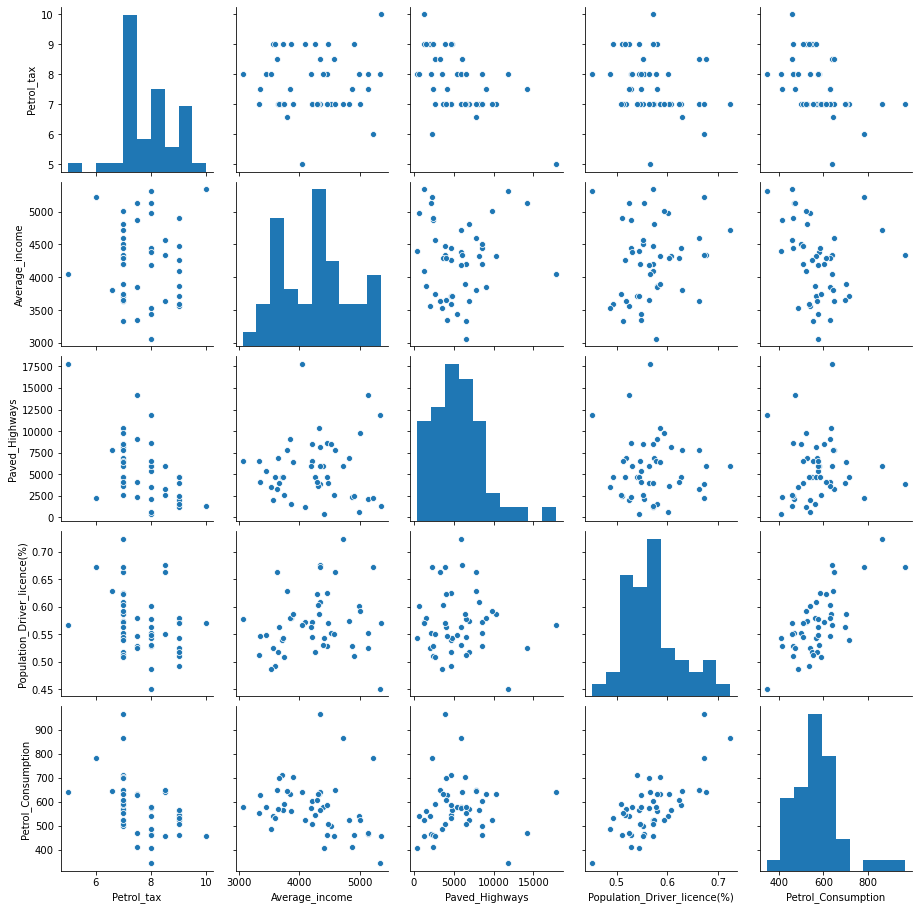

In [25]:
# Pair plot 
sns.pairplot(df)
plt.show()

### Dataset split for training and testing

In [26]:
# Feature variables 
X=df.iloc[:,0:4]
y=df[["Petrol_Consumption"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)

### Building multipl Regression (Trial)

In [27]:
from sklearn.linear_model import LinearRegression
multipleRegression=LinearRegression()
multipleRegression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Get model parameters
intercept=multipleRegression.intercept_
slopes=multipleRegression.coef_

print("Intercept is {} and slopes are {}".format(intercept, slopes))

Intercept is [663.38681928] and slopes are [[-4.00116499e+01 -7.71048724e-02 -2.57122620e-03  9.70605410e+02]]


### Make prediction based on test data

In [29]:
y_pred=multipleRegression.predict(X_test)

In [30]:
df_pred=pd.DataFrame({"Predicted": [x[0] for x in y_pred.tolist()], "Actual": [x[0] for x in y_test.values.tolist()]})

df_pred.head()

,Predicted,Actual
0,707.188206,865
1,570.986352,508
2,595.445734,577
3,607.280640,554
4,503.876480,580


### Check model accuracy quantitatively 

In [31]:
# Check R^2 for train and test

R2_train=multipleRegression.score(X_train, y_train)

R2_test=multipleRegression.score(X_test, y_test)

print("R2_train is {:.3} and R2_test is {:.3}".format(R2_train, R2_test))
# Check MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)

print("MSE is {} and MAE is {:.3}".format(round(MSE,3),MAE))

R2_train is 0.702 and R2_test is 0.553
MSE is 12192.283 and MAE is 80.8


### Model Accuracy Visualization

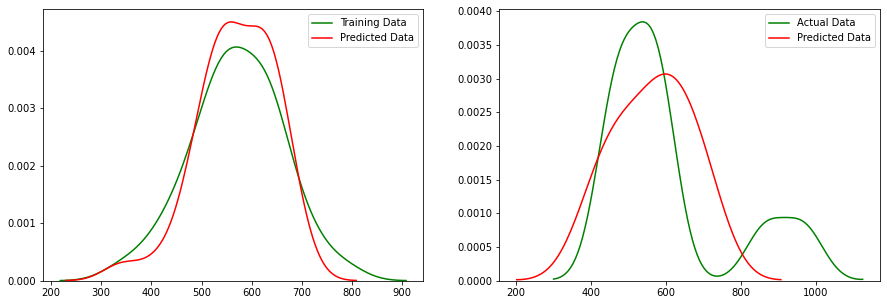

In [32]:
# Make prediction on training data
y_train_pred=multipleRegression.predict(X_train)
# Make distribution plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(y_train, hist=False, color="g", label="Training Data")
sns.distplot(y_train_pred,hist=False,color="r",label="Predicted Data")
plt.subplot(1,2,2)
sns.distplot(y_test, hist=False, color="g", label="Actual Data" )
sns.distplot(y_pred,hist=False,color="r",label="Predicted Data")
plt.legend()
plt.show()

## Polynomial Regression (Trial) 

In [33]:
# Transform feature to second order 
from sklearn.preprocessing import PolynomialFeatures

polyOrder=PolynomialFeatures(degree=2)

X_poly=polyOrder.fit_transform(X)

In [34]:
# Split dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [35]:
# Building a second-order polynomial model

polyModel=LinearRegression()
polyModel.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make prediction on testdata
y_pred=polyModel.predict(X_test)

df_pred=pd.DataFrame({"Predicted": [x[0] for x in y_pred.tolist()], "Actual": [x[0] for x in y_test.values.tolist()]})

df_pred.head()

,Predicted,Actual
0,598.219346,631
1,684.951004,587
2,572.904670,577
3,580.529787,591
4,516.369764,460


In [37]:
# Check model accuracy using R^2
R2_train=polyModel.score(X_train, y_train)

R2_test=polyModel.score(X_test, y_test)
# Check model accuracy using MSE and MAE
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)

print("R2_train is {:.3} and R2_test is {:.3}".format(R2_train, R2_test))

print("MSE is {} and MAE is {}".format(round(MSE,2),round(MAE,2)))

R2_train is 0.834 and R2_test is 0.357
MSE is 4314.28 and MAE is 49.14


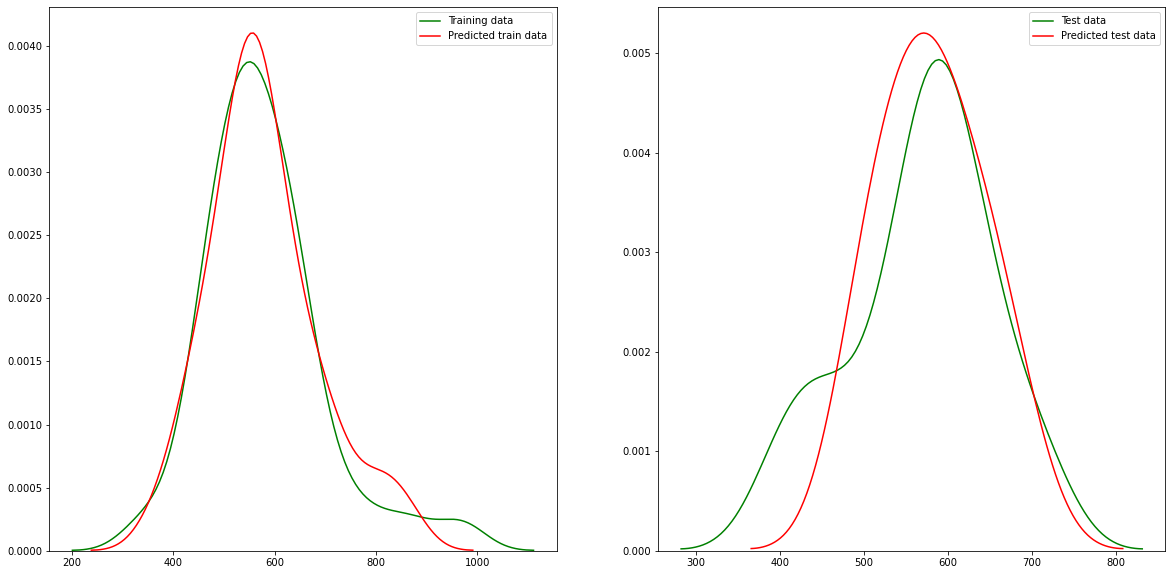

In [38]:
# Visualization the output 
y_train_pred=polyModel.predict(X_train)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(y_train, hist=False,color="g", label="Training data")
sns.distplot(y_train_pred, hist=False, color="r", label="Predicted train data")
# Second plot 
plt.subplot(1,2,2)
sns.distplot(y_test, hist=False, color="g",label="Test data")
sns.distplot(y_pred, hist=False, color="r", label="Predicted test data")
plt.legend()
plt.show()

### Try feature selection

##### SelectKbest Method

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [40]:
# Select best features 
bestFeature=SelectKBest(score_func=f_regression, k="all")

bestFeature.fit(X,y)

print(bestFeature.scores_)

[1.17638281e+01 2.93395443e+00 1.66854400e-02 4.39408334e+01]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
# Produce a dataframe 

df_score=pd.DataFrame({"Feature":X.columns.tolist(),"Scores":bestFeature.scores_})

df_score.sort_values(by=["Scores"], inplace=True,ascending=False)

df_score

,Feature,Scores
3,Population_Driver_licence(%),43.940833
0,Petrol_tax,11.763828
1,Average_income,2.933954
2,Paved_Highways,0.016685


##### ExtraTreesRegressor

In [42]:
from sklearn.ensemble import ExtraTreesRegressor

In [43]:
bestFeature=ExtraTreesRegressor()

fitModel=bestFeature.fit(X,y)

print(fitModel.feature_importances_)

<ipython-input-43-638dcc338f5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fitModel=bestFeature.fit(X,y)


[0.15583964 0.20216628 0.10385914 0.53813495]


<AxesSubplot:>

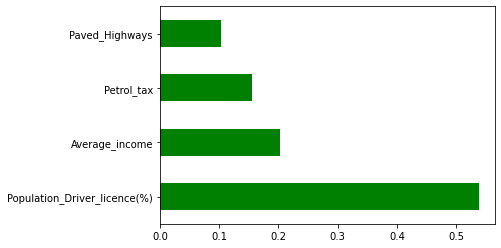

In [44]:
# Visualization 

feature_importance=pd.Series(fitModel.feature_importances_, index=X.columns)

feature_importance.nlargest(4).plot(kind='barh', color="g")